In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,213892,Male,48,1,35.0,1,1-2 Year,No,24922.0,26.0,86,0
1,269011,Male,58,1,28.0,0,1-2 Year,Yes,63541.0,26.0,57,0
2,31464,Male,44,1,28.0,1,1-2 Year,No,30027.0,26.0,286,0
3,86379,Female,22,1,8.0,0,< 1 Year,Yes,35039.0,152.0,180,0
4,456843,Male,24,1,6.0,1,< 1 Year,No,24149.0,152.0,17,0


In [6]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,151069,Male,23,1,41.0,1,< 1 Year,No,27117.0,152.0,79
1,460048,Female,42,1,28.0,1,1-2 Year,No,63230.0,26.0,287
2,362380,Male,47,1,28.0,1,1-2 Year,Yes,40571.0,124.0,265
3,191116,Male,23,1,41.0,1,< 1 Year,No,28049.0,152.0,226
4,422660,Male,42,1,41.0,0,> 2 Years,Yes,32520.0,124.0,292


In [7]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [17]:
train.info()

['1-2 Year' '< 1 Year' '> 2 Years']
[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229292 entries, 0 to 229291
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    229292 non-null  int64  
 1   Gender                229292 non-null  object 
 2   Age                   229292 non-null  int64  
 3   Driving_License       229292 non-null  int64  
 4   Region_Code           229292 non-null  float64
 5   Previously_Insured    229292 non-null  int64  
 6   Vehicle_Age           229292 non-null  object 
 7   Vehicle_Damage        229292 non-null  object 
 8   Annual_Premium        229292 non-null  float64
 9   Policy_Sales_Channel  229292 non-null  float64
 10  Vintage               229292 non-null  int64  
 11  Response              229292 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 21.0+ MB


In [11]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000
mean,234460.942475,38.554987,0.998138,26.420207,0.489062,30730.076549,111.923669,154.194425,0.164079
std,139490.034283,15.231658,0.043114,13.191474,0.499881,17054.686028,54.308261,83.727049,0.370348
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115085.000000,25.000000,1.000000,15.000000,0.000000,24564.000000,26.000000,82.000000,0.000000
50%,230564.500000,36.000000,1.000000,28.000000,0.000000,31709.000000,140.000000,154.000000,0.000000
75%,345683.500000,49.000000,1.000000,35.000000,1.000000,39470.000000,152.000000,227.000000,0.000000
max,508144.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df = train.copy()

le = LabelEncoder()
# transformer = MinMaxScaler()
transformer = StandardScaler()

df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = transformer.fit_transform(df[['Age']])
df['Region_Code'] = transformer.fit_transform(df[['Region_Code']])
df['Annual_Premium'] = transformer.fit_transform(df[['Annual_Premium']])
df['Policy_Sales_Channel'] = transformer.fit_transform(df[['Policy_Sales_Channel']])
df['Vintage'] = transformer.fit_transform(df[['Vintage']])

# df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year': 0,'1-2 Year': 3, '> 2 Years': 4})

df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])

df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,213892,1,0.620092,1,0.650406,1,3,0,-0.340557,-1.582151,-0.814487,0
1,269011,1,1.276621,1,0.119759,0,3,1,1.923870,-1.582151,-1.160851,0
2,31464,1,0.357481,1,0.119759,1,3,0,-0.041225,-1.582151,1.574233,0
3,86379,0,-1.086883,1,-1.396375,0,0,1,0.252654,0.737943,0.308211,0
4,456843,1,-0.955577,1,-1.547989,1,0,0,-0.385882,0.737943,-1.638595,0
...,...,...,...,...,...,...,...,...,...,...,...,...
229287,50272,1,2.195761,1,0.119759,1,3,0,0.495637,0.240780,1.036771,0
229288,254780,1,-1.152535,1,-0.183468,1,0,0,-1.647649,0.737943,-0.265081,0
229289,380053,1,0.291828,1,0.195566,0,4,1,-1.647649,0.811597,0.965109,0
229290,69958,0,-1.218188,1,1.560086,1,0,1,0.013482,0.885251,-1.650539,0


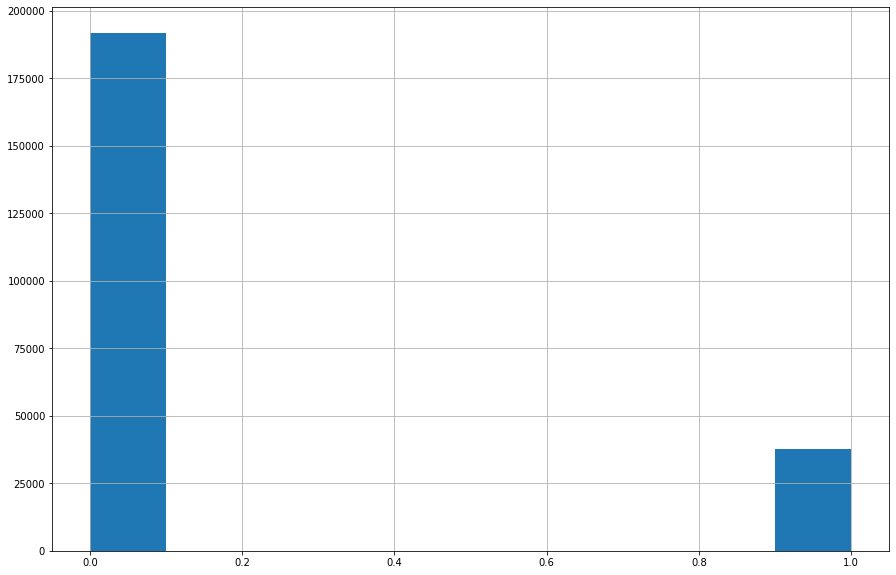

In [7]:
plt.figure(figsize=(15, 10))
x = df[['Age', 'Gender', 'Driving_License', 'Region_Code',
      'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
      'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

y = df['Response']
y.hist()
plt.show()

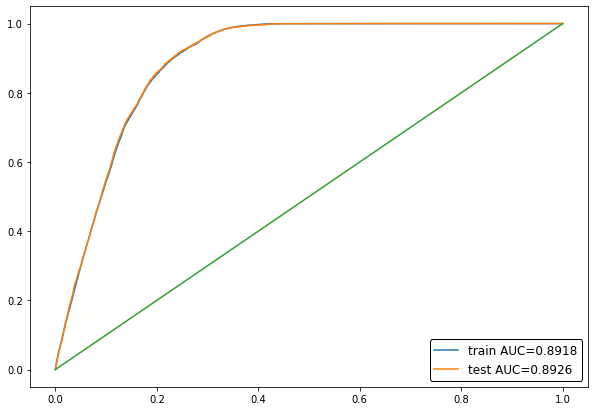

In [13]:
# dt_imputer = DecisionTreeClassifier()
# knn_imputer = KNeighborsClassifier()
# lr_imputer = LogisticRegression()

rfc_imputer = RandomForestClassifier(max_depth=7, random_state=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=70)
# inputed_df = knn_imputer.fit(x_train, y_train)
# inputed_df_lr = lr_imputer.fit(x_train, y_train)
# inputed_df_dt = dt_imputer.fit(x_train, y_train)

inputed_rfc = rfc_imputer.fit(x_train, y_train)

y_train_predicted_lr = inputed_rfc.predict_proba(x_train)[:, 1]
y_val_predicted_lr = inputed_rfc.predict_proba(x_test)[:, 1]

def roc_auc_plot(y_train, y_train_predicted, y_val, y_val_predicted):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_val, y_val_predicted)

    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

roc_auc_plot(y_train, y_train_predicted_lr, y_test, y_val_predicted_lr)

In [91]:
test_id = df['id']
test = df[['Age', 'Gender', 'Driving_License', 'Region_Code',
      'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
      'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

y_test_predicted_lr = rfc_imputer.predict_proba(test)[:, 1]

def create_submission(id_col, y_pred):
    submission = pd.DataFrame({
        'id': id_col,
        'Response': y_pred
    })
    return submission

sub = create_submission(test_id, y_test_predicted_lr)
sub

,id,Response
0,151069,0.000409
1,460048,0.003717
2,362380,0.090821
3,191116,0.000378
4,422660,0.443771
...,...,...
152857,368806,0.086836
152858,55749,0.000495
152859,112077,0.000484
152860,443675,0.000299


In [92]:
sub.to_csv("sub.csv", index=False)